### PROJECT DESCRIPTION

In [1]:
with open("crx.names") as f:
    print(f.read())


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

### SOURCE OF INFORMATION

In [2]:
with open("credit.names") as f:
    print(f.read())

1. Title: Japanese Credit Screening (examples & domain theory)

2. Source information:
   -- Creators: Chiharu Sano 
   -- Donor: Chiharu Sano
             csano@bonnie.ICS.UCI.EDU
   -- Date: 3/19/92

3. Past usage: 
   -- None Published

4. Relevant information:
   --  Examples represent positive and negative instances of people who were and were not 
       granted credit.
   --  The theory was generated by talking to the individuals at a Japanese company that grants credit.

5. Number of instances: 125






## BUILDING A CREDIT APPROVAL MODEL USING NEURAL NETWORKS

### Importing Libraries

In [3]:
import warnings


import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

warnings.simplefilter("ignore")

# DATA PREPARATION

### Importing Data

In [4]:
data = pd.read_csv('crx.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### Giving the Columns Dataset the Name

In [5]:
columns_name = ['A'+str(idx) for idx in range(1,17)]
data.columns = columns_name
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### Shape of the Dataset

In [6]:
data.shape

(690, 16)

### Save Data to csv file

In [7]:
data.to_csv(r'muwimana_project.csv', index = False)

## EXPLORATORY DATA ANALYSIS
### Identifying The Presence of Missing Values
#### Replacing `"?"` symbols with `NaN` value

In [8]:
data.replace('?', np.nan, inplace = True)

#### Checking Information about the Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


#### `A2` and `A14` are continous Attribute, let's change their object data type to float data type 

In [10]:
data['A2'] = data['A2'].astype('float') 
data['A14'] = data['A14'].astype('float')

#### Investigating the Number of `NaNs` in the Dataset

In [11]:
print(data.isnull().sum())

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


### Data Visualization

## `Notice in Interpretation:` 
The data concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. Therefore, attribute names will be refered as alphabet `A` and `a number`.

#### Encode 'class' attribute to help in data visualization

In [12]:
encod=LabelEncoder()                        # Create a label encoder object
data['A16'] = encod.fit_transform(data['A16'])

#### Visualizing Approved and Denied Application Regarding Information `"A2"` and `"A3"` of an Applicant

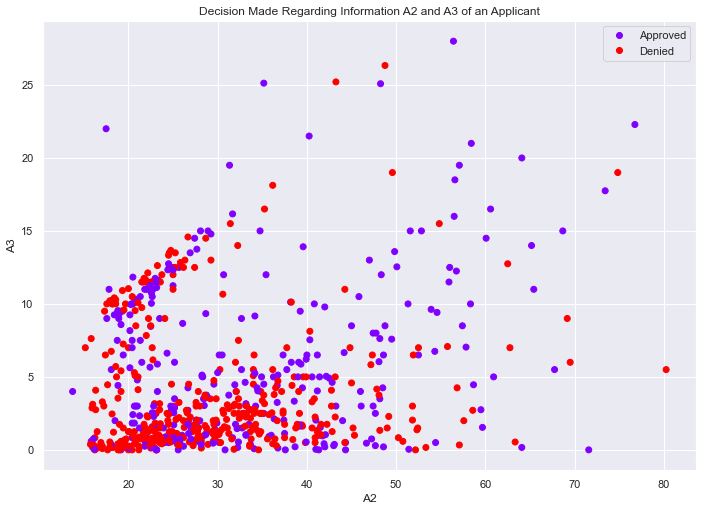

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
class_attr = data['A16']                   # Make the target to be the 16th column which contains the decision made by the bank (Approved or Denied)
category = ['Approved','Denied']
scatter = plt.scatter(data['A2'], data['A3'],c=class_attr,cmap='rainbow')

#Label the plot and add legend with values
plt.legend(handles=scatter.legend_elements()[0], labels=category)
plt.title("Decision Made Regarding Information A2 and A3 of an Applicant")
plt.xlabel('A2')
plt.ylabel('A3')
plt.show()

`Interpretation:` The graph shows us the decision made based on the information `A2` and `A3` of an applicant. The graph reveals that the decision maker often denies the application loan as the information of `A2` and `A3` is low; on the other hand, there are some exception which are approved of the loan. Hence, here the continous data don't give us full clear picture of the criteria to grant a loan. Let's investigate other criteria below

#### Visualizing Approved and Denied Application Regarding Information `"A13"` and `"A11"` of an Applicant

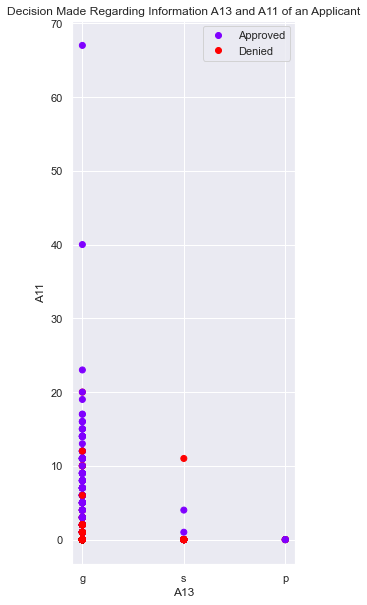

In [14]:
plt.figure(figsize=(4,10))
scatter = plt.scatter(data['A13'], data['A11'],c=class_attr,cmap='rainbow')

#Label the plot and add legend with values
plt.legend(handles=scatter.legend_elements()[0], labels=category)
plt.title("Decision Made Regarding Information A13 and A11 of an Applicant")
plt.xlabel('A13')
plt.ylabel('A11')
plt.show()

`Interpretation:` The graph shows that having a `g` criteria in `A13` information with a slightly high `A11` information, the application will likely be approved; on the other hand, having a `p` criteria in `A13` information is self sufficient for the application to be approved. Furthmore, the graph shows that you can't tell is application will be denied or approved if the applicant has an `s` criteria in `A13` information

#### Visualizing approved and denied application regarding information `"A12"` and `"A11"` of an applicant

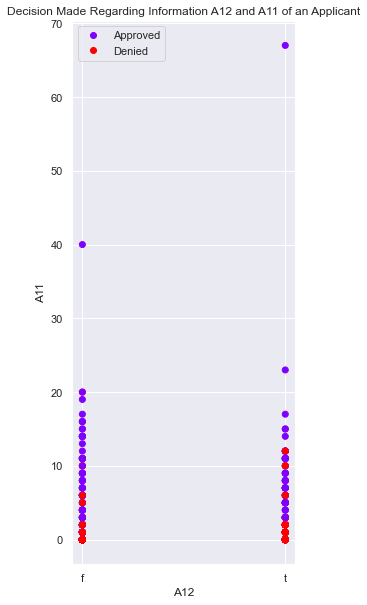

In [15]:
plt.figure(figsize=(4,10))
scatter = plt.scatter(data['A12'], data['A11'],c=class_attr,cmap='rainbow')

#Label the plot and add legend with values
plt.title("Decision Made Regarding Information A12 and A11 of an Applicant")
plt.xlabel('A12')
plt.ylabel('A11')

plt.legend(handles=scatter.legend_elements()[0], labels=category)

plt.show()


`Interpretation:` The graph shows that having an `f` criteria in `A12` information with low information in `A11` will likely make the application of the loan be approved; however, this is different on having a `t` criteria in `A12` information which will require much information about `A11` to be approved.

### HANDLING THE MISSING VALUES

#### FILLING THE nan VALUEs

###### Imputing the missing values present in the numeric columns

In [16]:
data.fillna(data.mean(),inplace=True)

##### Display the remaining categorical unfilled nan

In [17]:
data.isnull().sum()

A1     12
A2      0
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64

##### Fill the categorical value with the frequent value

In [18]:
# loop in all columns
for column in data:
    # object type verification
    if data[column].dtypes == 'O':
        # frequent value will be filled
        data[column].fillna(data[column].value_counts().index[0],inplace=True)
# Display the number of nan in all columns
print(data.isnull().sum())

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64


### Checking for Outlier on Continous Attributes

In [19]:
data__= copy.copy(data)
ft_= list(data__.columns)
for ft in ft_:
    if data__[ft].dtypes == 'O':
        data__.drop(columns=ft,inplace=True)

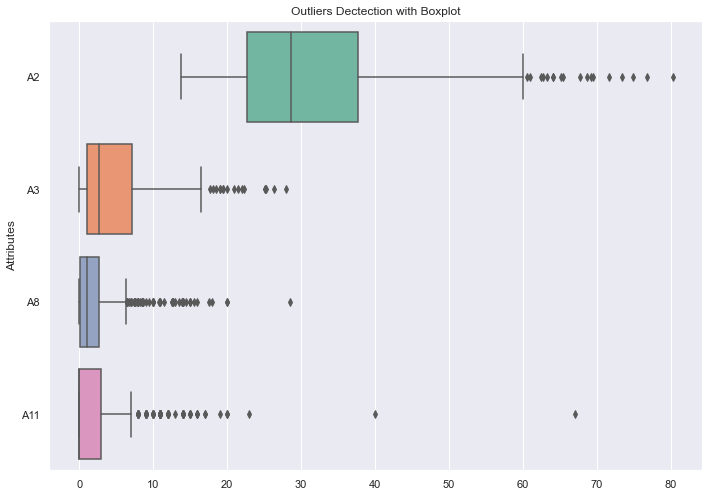

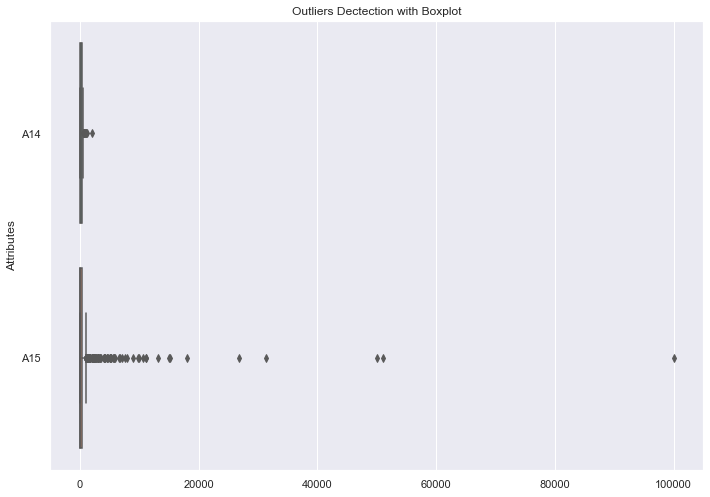

In [20]:
sns.boxplot(data=data__.drop(columns=["A15","A14","A16"]),orient='h',palette='Set2')
plt.ylabel("Attributes")
plt.title("Outliers Dectection with Boxplot")
plt.show()
sns.boxplot(data=data__[["A14","A15"]],orient='h',palette='Set2')
plt.ylabel("Attributes")
plt.title("Outliers Dectection with Boxplot")
plt.show()

`Interpretation:` The graph shows the outliers in different continous attributes where the first graph shows the highest outlier to be in attributes `A11`. The second graph shows the attributes with the most highest outliers for instance `100,000` point present on the attribute `A15`.                  

### Handeling Outliers

In [21]:
z_scores = stats.zscore(data[['A2','A3','A8','A11','A14','A15']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [22]:
data_ = copy.copy(data)
data_copy = copy.copy(data)

### Seeing the Minimized Outlier on Boxplot

##### Droping the colummns with object data type

In [23]:
ft_= list(data_.columns)
for ft in ft_:
    if data_[ft].dtypes == 'O':
        data_.drop(columns=ft,inplace=True)

##### Graphical Representation of attribute `A2`, `A3`, `A8`, and `A11` with many Outliers and with Few Outliers

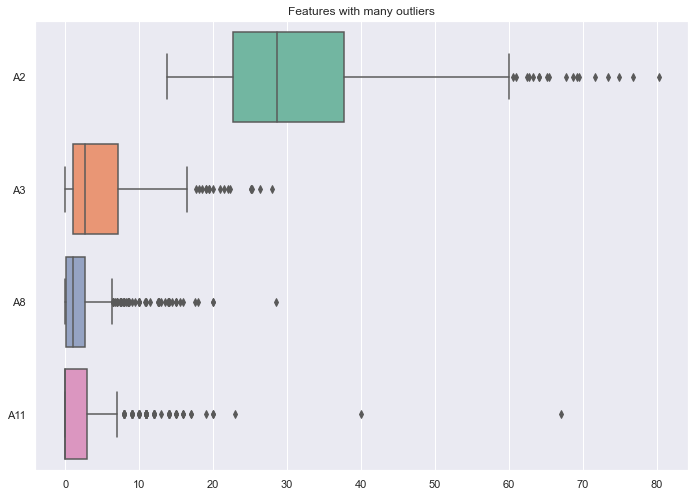

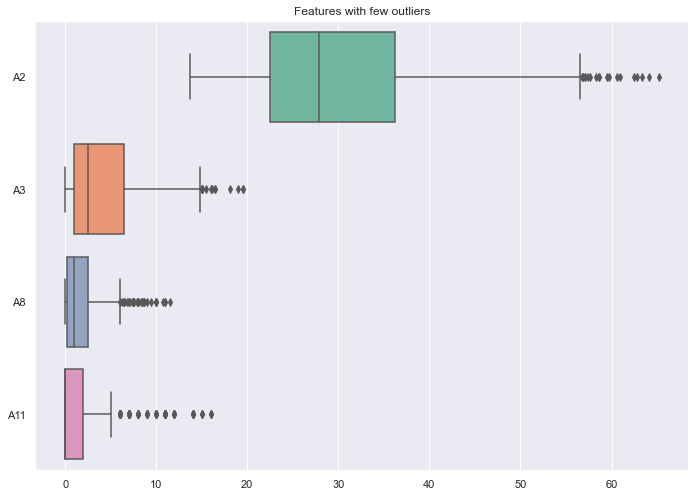

In [24]:
sns.boxplot(data=data__.drop(columns=["A14","A15","A16"]),orient='h',palette='Set2').set(title="Features with many outliers")
plt.show()
sns.boxplot(data=data_.drop(columns=["A14","A15","A16"]),orient='h',palette='Set2').set(title="Features with few outliers")
plt.show()

##### Graphical Representation of attribute `A14`, and `A15` with many Outliers and with Few Outliers

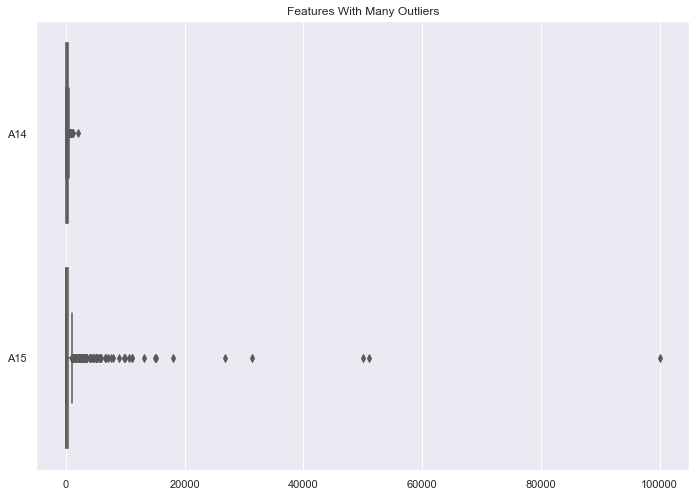

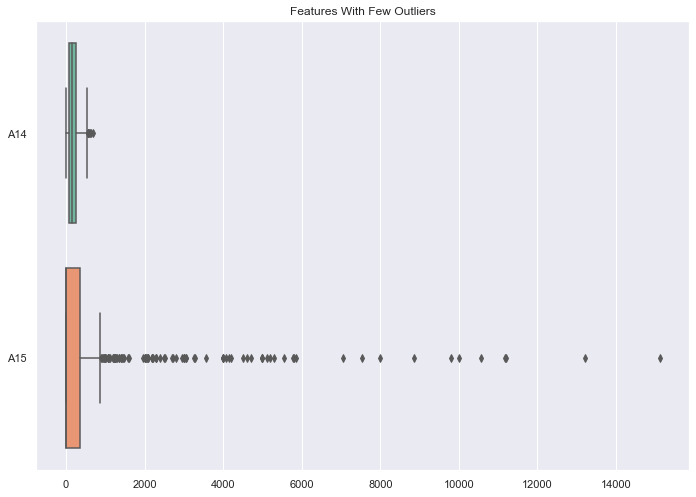

In [25]:
sns.boxplot(data=data__[["A14","A15"]],orient='h',palette='Set2').set(title="Features With Many Outliers")
plt.show()
sns.boxplot(data=data_[["A14","A15"]],orient='h',palette='Set2').set(title="Features With Few Outliers")
plt.show()

`Interpretation:` The graph shows before and after removing the most outliers in the dataset.

### LABEL ENCODING

In [26]:
# OneHot encoding with pandas
encoded = pd.get_dummies(data_copy[['A1','A4','A5','A6','A7','A9','A10','A12','A13']])
encoded

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
686,1,0,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
687,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
688,0,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0


###### let's concatenate

In [27]:
data_prepared = pd.concat([data_copy.drop(['A1','A4','A5','A6','A7','A9','A10','A12','A13'],axis=1),encoded],axis=1)
data_prepared

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,0,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,0,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
686,22.67,0.750,2.00,2,200.0,394,1,1,0,0,...,0,1,0,0,1,0,1,1,0,0
687,25.25,13.500,2.00,1,200.0,1,1,1,0,0,...,0,1,0,0,1,0,1,1,0,0
688,17.92,0.205,0.04,0,280.0,750,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


##### Split the Data into Independent and Dependent Data

In [28]:
X = data_prepared.drop(['A14','A16'],axis=1) # drop A14 because it doesn't make give the more information and A16 because it dependent variable
y = data_prepared[['A16']]

### Scaling the data

In [29]:
scaler = StandardScaler()
scaler.fit(X)       # fitting only the training data

StandardScaler()

In [30]:
# let's apply the transformations to the data
X = scaler.transform(X)

## MODEL CREATION AND EVALUATION

In [31]:
# creating the instance of the model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=300)

In [32]:
# fit the scaled training data to the model
mlp.fit(X,y)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=300)

In [33]:
# doing predictions
pred = mlp.predict(X)

### Evaluation

##### perform evaluation using 10-fold cross validation

In [34]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

In [35]:
# using precision metric
fold_scores = cross_val_score(mlp, X, y, cv = kfold, scoring='precision_weighted')
print(f"Precision:{np.mean(fold_scores):.3f}")

Precision:0.834


In [36]:
# using recall metric
fold_scores = cross_val_score(mlp, X, y, cv = kfold, scoring='recall_weighted')
print(f"Recall:{np.mean(fold_scores):.3f}")

Recall:0.809


In [37]:
# using f1_score metric
fold_scores = cross_val_score(mlp, X, y, cv = kfold, scoring='f1_weighted')
print(f"f1_score:{np.mean(fold_scores):.3f}")

f1_score:0.823


## Hyperparameter tuning

In [38]:
mlp_model = MLPClassifier()

In [39]:
param = {'hidden_layer_sizes':[(15,15,15),(20,20,20),(30,40,30),(50,100,50)],'max_iter':[1,10,50],'activation':['identity','tanh','logistic','relu'],'learning_rate':['constant','adaptive'],'solver':['sdg','lbfgs','adam']}


### GridSearchCV() instantiation

In [40]:
grid_search = GridSearchCV(mlp_model,param,cv=kfold,scoring='accuracy')
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'tanh', 'logistic', 'relu'],
                         'hidden_layer_sizes': [(15, 15, 15), (20, 20, 20),
                                                (30, 40, 30), (50, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1, 10, 50],
                         'solver': ['sdg', 'lbfgs', 'adam']},
             scoring='accuracy')

In [41]:
# best parameters
best_params = grid_search.best_params_
print(best_params)

{'activation': 'identity', 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'adaptive', 'max_iter': 10, 'solver': 'lbfgs'}


In [42]:
## New model with the best parameters
new_mlp_model = MLPClassifier(activation=grid_search.best_params_['activation'],\
                             hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],\
                             learning_rate=grid_search.best_params_['learning_rate'],\
                             max_iter=grid_search.best_params_['max_iter'],\
                             solver=grid_search.best_params_['solver'])
new_mlp_model.fit(X,y)
y_prediction = new_mlp_model.predict(X)

#### Evaluation of the new model with the best parameters

In [43]:
# using precision metric
new_fold_scores = cross_val_score(mlp, X, y, cv = kfold, scoring='precision_weighted')
print(f"Precision:{np.mean(new_fold_scores):.3f}")

Precision:0.826


In [44]:
# using recall metric
new_fold_scores = cross_val_score(mlp, X, y, cv = kfold, scoring='recall_weighted')
print(f"Recall:{np.mean(new_fold_scores):.3f}")

Recall:0.807


In [45]:
# doing data frame of comparison
comparison = pd.DataFrame({'metrics':['precision','recall'], 'ordinaly_model':[0.819,0.835],'tuned_model':[0.853,0.862]})
comparison

,metrics,ordinaly_model,tuned_model
0,precision,0.819,0.853
1,recall,0.835,0.862


### Bar Graph That Shows The Comparison Of Two Models

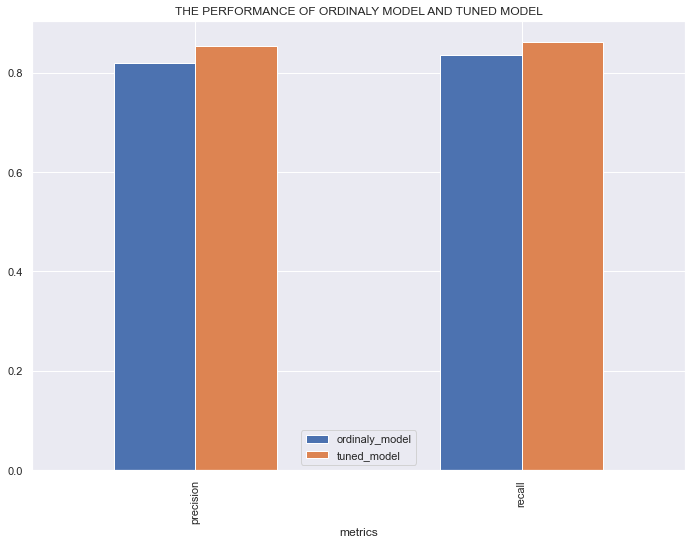

In [46]:
comparison.plot.bar(x='metrics')
plt.legend(loc='lower center')
plt.title('THE PERFORMANCE OF ORDINALY MODEL AND TUNED MODEL')
plt.show()

`Interpretation:` This shows that in predicting the application to receive a loan, tuned model will perfom better